#Linear Dicremenant Analysis

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving g-09-w2.csv to g-09-w2 (1).csv


In [0]:
dataset=pd.read_csv('g-09-w2.csv')

In [0]:
dataset

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,2.0,1.765998,1.280574,0.031411,5.366491,8.639256,2.0,0.193558,3.0,2.622698,0.893650,8.990137,7.755609
1,1,1.0,1.776363,1.361389,0.761303,6.353469,10.484468,2.0,0.011895,3.0,8.343507,0.978851,9.139275,6.104601
2,2,2.0,1.774271,1.660602,0.349677,3.443069,15.217140,1.0,0.058478,3.0,4.717711,1.426715,9.024671,8.548405
3,3,2.0,1.775124,1.243572,0.458525,4.826173,14.434667,2.0,0.310368,1.0,2.603179,0.765714,9.111226,14.122465
4,4,1.0,1.778930,1.280574,0.581080,6.288740,3.822806,1.0,0.766095,3.0,3.543636,0.395943,9.022079,7.664536
5,5,2.0,1.788330,1.440445,0.754207,6.317545,10.464320,2.0,0.067887,4.0,7.903398,1.010267,9.054161,4.881113
6,6,3.0,1.768097,1.435385,0.357850,10.585138,8.783065,3.0,0.197840,3.0,3.160792,0.823919,8.974808,7.972408
7,7,3.0,1.778313,1.603180,0.336718,4.176297,18.884884,1.0,0.304570,4.0,1.333287,0.718268,8.926797,6.784912
8,8,2.0,1.771022,1.280574,0.268869,9.119562,7.664682,2.0,0.505554,3.0,6.711860,1.121480,8.923246,4.508128
9,9,1.0,1.782885,1.691022,1.707133,5.635045,2.089065,1.0,0.366589,3.0,3.189797,0.776889,9.061203,9.532256


In [0]:
#dependent and independent variables
X=dataset.iloc[:, 2:14].values
Y=dataset.iloc[:, 1].values

In [0]:
#Cross validation by test and training data set
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test  = train_test_split(X,Y, test_size=0.2 , random_state=0)

In [0]:
X_train.shape

(800, 12)

In [0]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train=lda.fit_transform(X_train,Y_train)
X_test=lda.transform(X_test)


In [0]:
Y_test.shape

(200,)

In [0]:
#fit logistic regression to training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state = 0)
#classifier.fit(X_train, Y_train)
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#predictions of results
Y_pred = classifier.predict(X_test)

In [0]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[59, 15,  0,  0,  0],
       [18, 70,  5,  0,  0],
       [ 1, 16,  9,  0,  0],
       [ 0,  1,  5,  0,  0],
       [ 0,  0,  1,  0,  0]])

In [0]:
Y_train.shape

(800,)

In [0]:
classifier.score(X_test, Y_test)

0.69

In [0]:
accuracy=(59+70+9)/200
accuracy

0.69

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

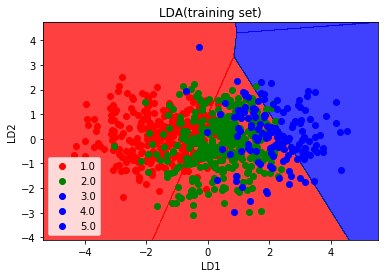

In [0]:
#Visualising training set result
from matplotlib.colors import ListedColormap
X_set,Y_set=X_train,Y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set ==j, 0], X_set[Y_set ==j,1],
                c= ListedColormap(('red','green','blue'))(i), label=j)
plt.title('LDA(training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

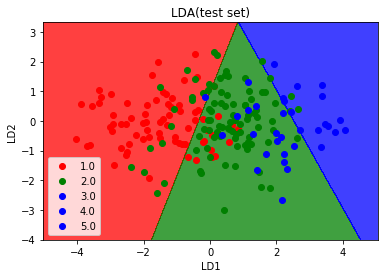

In [0]:
#Visualising testing set result
from matplotlib.colors import ListedColormap
X_set,Y_set=X_test,Y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set ==j, 0], X_set[Y_set ==j,1],
                c= ListedColormap(('red','green','blue'))(i), label=j)
plt.title('LDA(test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()